## Daten:
- Europawahl-Ergebnisse: https://www.bundeswahlleiterin.de/europawahlen/2024/ergebnisse/opendata/ew24/csv/
- Ausländeranteil (2023): https://service.destatis.de/DE/karten/migration_integration_regionen.html#A2_Sch_i
- Einkommen (2021): https://www.statistikportal.de/de/vgrdl/ergebnisse-kreisebene/einkommen-kreise
- Bevölkerung: https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/04-kreise.html


# Import, combine, clean data

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
os.getcwd()

'C:\\HSD\\OneDrive - Hochschule Düsseldorf\\projects\\2024_europawahl\\europawahl_2024_afd_analysis\\notebooks'

In [7]:
path_data = "../europawahl_daten"

In [3]:
#!pip install openpyxl

In [8]:
file_kreise = "04-kreise.xlsx"
daten_kreise = pd.read_excel(
    os.path.join(path_data, file_kreise),
    sheet_name="Kreisfreie Städte u. Landkreise",
    skiprows=3,
    header=[0, 1],
    )
daten_kreise.head()

Schlüssel-nummer Regionale Bezeichnung        Kreisfreie Stadt  \
  Unnamed: 0_level_1    Unnamed: 1_level_1       Kreis / Landkreis   
0                  1                     2                       3   
1                NaN                   NaN                     NaN   
2                 01    Schleswig-Holstein                     NaN   
3              01001      Kreisfreie Stadt        Flensburg, Stadt   
4              01002      Kreisfreie Stadt  Kiel, Landeshauptstadt   

               NUTS3    Fläche \nin km2 Bevölkerung2)                      \
  Unnamed: 3_level_1 Unnamed: 4_level_1     insgesamt  männlich  weiblich   
0                  4               5.00           6.0       7.0       8.0   
1                NaN                NaN           NaN       NaN       NaN   
2                NaN                NaN           NaN       NaN       NaN   
3              DEF01              56.73       92550.0   45874.0   46676.0   
4              DEF02             118.65      247717.0  120149.0  127568.0   

           
   je km2  
0     9.0  
1     NaN  
2     NaN  
3  1631.0  
4  2088.0

In [9]:
mask = [(len(str(x)) == 2) for x in daten_kreise.iloc[:, 0]]
bundesland = {x[0]: x[1] for x in daten_kreise[mask].iloc[:, :2].values}
bundesland

{'01': 'Schleswig-Holstein',
 '02': 'Hamburg',
 '03': 'Niedersachsen',
 '04': 'Bremen',
 '05': 'Nordrhein-Westfalen',
 '06': 'Hessen',
 '07': 'Rheinland-Pfalz',
 '08': 'Baden-Württemberg',
 '09': 'Bayern',
 '10': 'Saarland',
 '11': 'Berlin',
 '12': 'Brandenburg',
 '13': 'Mecklenburg-Vorpommern',
 '14': 'Sachsen',
 '15': 'Sachsen-Anhalt',
 '16': 'Thüringen'}

In [10]:
daten_kreise = daten_kreise.drop([0, 1], axis=0).dropna()
daten_kreise

Schlüssel-nummer Regionale Bezeichnung        Kreisfreie Stadt  \
    Unnamed: 0_level_1    Unnamed: 1_level_1       Kreis / Landkreis   
3                01001      Kreisfreie Stadt        Flensburg, Stadt   
4                01002      Kreisfreie Stadt  Kiel, Landeshauptstadt   
5                01003      Kreisfreie Stadt      Lübeck, Hansestadt   
6                01004      Kreisfreie Stadt       Neumünster, Stadt   
7                01051                 Kreis            Dithmarschen   
..                 ...                   ...                     ...   
467              16073             Landkreis     Saalfeld-Rudolstadt   
468              16074             Landkreis    Saale-Holzland-Kreis   
469              16075             Landkreis        Saale-Orla-Kreis   
470              16076             Landkreis                   Greiz   
471              16077             Landkreis        Altenburger Land   

                 NUTS3    Fläche \nin km2 Bevölkerung2)                      \
    Unnamed: 3_level_1 Unnamed: 4_level_1     insgesamt  männlich  weiblich   
3                DEF01              56.73       92550.0   45874.0   46676.0   
4                DEF02             118.65      247717.0  120149.0  127568.0   
5                DEF03             214.19      218095.0  104723.0  113372.0   
6                DEF04              71.66       79502.0   39256.0   40246.0   
7                DEF05            1428.17      135252.0   66561.0   68691.0   
..                 ...                ...           ...       ...       ...   
467              DEG0I            1008.78      101494.0   49926.0   51568.0   
468              DEG0J             815.24       83234.0   41328.0   41906.0   
469              DEG0K            1151.30       79178.0   39306.0   39872.0   
470              DEG0L             845.98       96381.0   47487.0   48894.0   
471              DEG0M             569.39       88787.0   43266.0   45521.0   

             
     je km2  
3    1631.0  
4    2088.0  
5    1018.0  
6    1109.0  
7      95.0  
..      ...  
467   101.0  
468   102.0  
469    69.0  
470   114.0  
471   156.0  

[400 rows x 9 columns]

In [11]:
file_election_results = "kerg2.csv"

data_election = pd.read_csv(os.path.join(path_data, file_election_results), skiprows=9, sep=";")
data_election

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
0,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wahlberechtigte,-4,NaN,61941751.0,NaN,61600263.0,NaN,"0,554361",NaN,NaN
1,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wählende,-3,NaN,40128348.0,"64,784007",37807746.0,"61,375949","6,137901","3,408058",NaN
2,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,1.0,332136.0,"0,827684",410857.0,"1,086701","-19,160194","-0,259016",NaN
3,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Gültige,-1,1.0,39796212.0,"99,172316",37396889.0,"98,913299","6,415836","0,259016",NaN
4,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,Partei,CDU,1,1.0,9431567.0,"23,69966",8438975.0,"22,565981","11,761997","1,133679",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,LETZTE GENERATION,31,1.0,68.0,"0,157927",NaN,NaN,NaN,NaN,NaN
16260,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PDV,32,1.0,36.0,"0,083608",NaN,NaN,NaN,NaN,NaN
16261,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PdF,33,1.0,112.0,"0,260114",NaN,NaN,NaN,NaN,NaN
16262,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,V-Partei³,34,1.0,50.0,"0,116122",NaN,NaN,NaN,NaN,NaN


In [12]:
mask1 = data_election.Gebietsart == "Kreis"
mask2 = data_election.Gruppenname == "AfD"
data_election[mask1 & mask2]

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
671,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,Partei,AfD,4,1.0,4273.0,"10,2835",2477.0,"6,285207","72,507065","3,998293",NaN
710,EP,09.06.2024,Kreis,1002,"Kiel, Landeshauptstadt",LAND,1.0,Partei,AfD,4,1.0,9351.0,"8,023373",6459.0,"5,92471","44,774733","2,098663",NaN
749,EP,09.06.2024,Kreis,1003,"Lübeck, Hansestadt",LAND,1.0,Partei,AfD,4,1.0,10290.0,"10,723889",6773.0,"7,485219","51,926768","3,23867",NaN
788,EP,09.06.2024,Kreis,1004,"Neumünster, Stadt",LAND,1.0,Partei,AfD,4,1.0,5697.0,"17,402328",2761.0,"9,585141","106,338283","7,817186",NaN
827,EP,09.06.2024,Kreis,1051,Dithmarschen,LAND,1.0,Partei,AfD,4,1.0,11005.0,"16,297185",5121.0,"8,864616","114,899434","7,432569",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16074,EP,09.06.2024,Kreis,16073,Saalfeld-Rudolstadt,LAND,16.0,Partei,AfD,2,1.0,17307.0,"35,143971",14592.0,"27,611262","18,606086","7,532709",NaN
16113,EP,09.06.2024,Kreis,16074,Saale-Holzland-Kreis,LAND,16.0,Partei,AfD,2,1.0,14404.0,"31,875014",10210.0,"23,152977","41,077375","8,722036",NaN
16152,EP,09.06.2024,Kreis,16075,Saale-Orla-Kreis,LAND,16.0,Partei,AfD,2,1.0,14426.0,"37,642209",11264.0,"27,057411","28,071733","10,584798",NaN
16191,EP,09.06.2024,Kreis,16076,Greiz,LAND,16.0,Partei,AfD,2,1.0,18399.0,"35,37929",13297.0,"25,542664","38,369557","9,836627",NaN


In [13]:
def str_to_num(input):
    return float(input.replace(",", "."))


data_election[mask1 & mask2].Prozent.apply(str_to_num)

671      10.283500
710       8.023373
749      10.723889
788      17.402328
827      16.297185
           ...    
16074    35.143971
16113    31.875014
16152    37.642209
16191    35.379290
16230    36.910679
Name: Prozent, Length: 400, dtype: float64

In [14]:
results_afd = pd.DataFrame({
    "Gebietsname": data_election[mask1 & mask2].Gebietsname,
    "Gebietsnummer": data_election[mask1 & mask2].Gebietsnummer,
    "afd": data_election[mask1 & mask2].Prozent.apply(str_to_num),
}
)
results_afd

,Gebietsname,Gebietsnummer,afd
671,"Flensburg, Stadt",1001,10.283500
710,"Kiel, Landeshauptstadt",1002,8.023373
749,"Lübeck, Hansestadt",1003,10.723889
788,"Neumünster, Stadt",1004,17.402328
827,Dithmarschen,1051,16.297185
...,...,...,...
16074,Saalfeld-Rudolstadt,16073,35.143971
16113,Saale-Holzland-Kreis,16074,31.875014
16152,Saale-Orla-Kreis,16075,37.642209
16191,Greiz,16076,35.379290


In [15]:
bundesland

{'01': 'Schleswig-Holstein',
 '02': 'Hamburg',
 '03': 'Niedersachsen',
 '04': 'Bremen',
 '05': 'Nordrhein-Westfalen',
 '06': 'Hessen',
 '07': 'Rheinland-Pfalz',
 '08': 'Baden-Württemberg',
 '09': 'Bayern',
 '10': 'Saarland',
 '11': 'Berlin',
 '12': 'Brandenburg',
 '13': 'Mecklenburg-Vorpommern',
 '14': 'Sachsen',
 '15': 'Sachsen-Anhalt',
 '16': 'Thüringen'}

In [16]:
zipcodes = daten_kreise["Schlüssel-nummer"].astype(int)

bev = []
bev_dichte = []
bev_female_ratio = []
for i, row in results_afd.iterrows():
    zip = row["Gebietsnummer"]
    idx = np.where(zipcodes == zip)[0][0]
    bev.append(daten_kreise.iloc[idx, :]["Bevölkerung2)"]["insgesamt"])
    bev_dichte.append(daten_kreise.iloc[idx, :]["Bevölkerung2)"]["je km2"])
    ratio = daten_kreise.iloc[idx, :]["Bevölkerung2)"]["weiblich"] / daten_kreise.iloc[idx, :]["Bevölkerung2)"]["insgesamt"]
    bev_female_ratio.append(ratio)


In [17]:
def get_bundesland(entry):
    if len(entry) == 4:
        return "0" + entry[0]
    return entry[:2]

bundesland_pro_kreis = [bundesland[get_bundesland(str(x[0]))] for x in daten_kreise["Schlüssel-nummer"].astype(int).values]

In [18]:
results_afd["bevölkerung"] = bev
results_afd["bevölkerungsdichte"] = bev_dichte
results_afd["weiblich_zu_männlich"] = bev_female_ratio
results_afd["bundesland"] = bundesland_pro_kreis

results_afd

,Gebietsname,Gebietsnummer,afd,bevölkerung,bevölkerungsdichte,weiblich_zu_männlich,bundesland
671,"Flensburg, Stadt",1001,10.283500,92550.0,1631.0,0.504333,Schleswig-Holstein
710,"Kiel, Landeshauptstadt",1002,8.023373,247717.0,2088.0,0.514975,Schleswig-Holstein
749,"Lübeck, Hansestadt",1003,10.723889,218095.0,1018.0,0.519829,Schleswig-Holstein
788,"Neumünster, Stadt",1004,17.402328,79502.0,1109.0,0.506226,Schleswig-Holstein
827,Dithmarschen,1051,16.297185,135252.0,95.0,0.507874,Schleswig-Holstein
...,...,...,...,...,...,...,...
16074,Saalfeld-Rudolstadt,16073,35.143971,101494.0,101.0,0.508089,Thüringen
16113,Saale-Holzland-Kreis,16074,31.875014,83234.0,102.0,0.503472,Thüringen
16152,Saale-Orla-Kreis,16075,37.642209,79178.0,69.0,0.503574,Thüringen
16191,Greiz,16076,35.379290,96381.0,114.0,0.507299,Thüringen


In [19]:
daten_kreise.iloc[2, :]["Bevölkerung2)"]["männlich"]

104723.0

In [20]:
daten_kreise.iloc[2, :]

Schlüssel-nummer       Unnamed: 0_level_1                 01003
Regionale Bezeichnung  Unnamed: 1_level_1      Kreisfreie Stadt
Kreisfreie Stadt       Kreis / Landkreis     Lübeck, Hansestadt
NUTS3                  Unnamed: 3_level_1                 DEF03
Fläche \nin km2        Unnamed: 4_level_1                214.19
Bevölkerung2)          insgesamt                       218095.0
                       männlich                        104723.0
                       weiblich                        113372.0
                       je km2                            1018.0
Name: 5, dtype: object

In [21]:
file_einkommen = "vgrdl_r2b3_bs2022.xlsx"
data_einkommen = pd.read_excel(os.path.join(path_data, file_einkommen), sheet_name="2.4", skiprows=4, header=0, dtype={"Regional-schlüssel": str,})

C:\Users\flori\anaconda3\envs\big_data\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Inhalt!$A:$H.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [22]:
data_einkommen = data_einkommen.drop(0, axis=0)
data_einkommen.head()

,Lfd. Nr.,EU-Code,Regional-schlüssel,Land,NUTS 1,NUTS 2,NUTS 3,Gebietseinheit,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,1.0,DE1,08,BW,1.0,NaN,NaN,Baden-Württemberg,15430,15736,...,22128.0,22365.0,22920.0,23206.0,23755.0,24467.0,25214.0,25493.0,25508.0,26039.0
2,2.0,DE11,081,BW,NaN,2.0,NaN,"Stuttgart, Regierungsbezirk",16062,16370,...,22904.0,23116.0,23620.0,23836.0,24456.0,25304.0,25730.0,26077.0,26093.0,26678.0
3,3.0,DE111,08111,BW,NaN,NaN,3.0,"Stuttgart, Landeshauptstadt, Stadtkreis",17883,18210,...,23487.0,23555.0,24222.0,24358.0,24788.0,25665.0,26334.0,26125.0,26168.0,26888.0
4,4.0,DE112,08115,BW,NaN,NaN,3.0,"Böblingen, Landkreis",16465,16898,...,23059.0,23261.0,23741.0,24248.0,24481.0,25065.0,26034.0,26594.0,26672.0,27338.0
5,5.0,DE113,08116,BW,NaN,NaN,3.0,"Esslingen, Landkreis",17167,17472,...,23139.0,23462.0,23950.0,24243.0,24454.0,25308.0,26142.0,26372.0,26458.0,27106.0


In [23]:
data_einkommen["Regional-schlüssel"]

1         08
2        081
3      08111
4      08115
5      08116
       ...  
441    16076
442    16077
443    16056
444    16063
445       17
Name: Regional-schlüssel, Length: 445, dtype: object

In [24]:
def key_to_zip(key):
    miss = 5 - len(key)
    if miss > 0:
        return key + miss * "0"
    return key

[key_to_zip(key) for key in data_einkommen["Regional-schlüssel"]]

['08000',
 '08100',
 '08111',
 '08115',
 '08116',
 '08117',
 '08118',
 '08119',
 '08121',
 '08125',
 '08126',
 '08127',
 '08128',
 '08135',
 '08136',
 '08200',
 '08211',
 '08212',
 '08215',
 '08216',
 '08221',
 '08222',
 '08225',
 '08226',
 '08231',
 '08235',
 '08236',
 '08237',
 '08300',
 '08311',
 '08315',
 '08316',
 '08317',
 '08325',
 '08326',
 '08327',
 '08335',
 '08336',
 '08337',
 '08400',
 '08415',
 '08416',
 '08417',
 '08421',
 '08425',
 '08426',
 '08435',
 '08436',
 '08437',
 '09000',
 '09100',
 '09161',
 '09162',
 '09163',
 '09171',
 '09172',
 '09173',
 '09174',
 '09175',
 '09176',
 '09177',
 '09178',
 '09179',
 '09180',
 '09181',
 '09182',
 '09183',
 '09184',
 '09185',
 '09186',
 '09187',
 '09188',
 '09189',
 '09190',
 '09200',
 '09261',
 '09262',
 '09263',
 '09271',
 '09272',
 '09273',
 '09274',
 '09275',
 '09276',
 '09277',
 '09278',
 '09279',
 '09300',
 '09361',
 '09362',
 '09363',
 '09371',
 '09372',
 '09373',
 '09374',
 '09375',
 '09376',
 '09377',
 '09400',
 '09461',


In [26]:
zipcodes = np.array([int(key_to_zip(key)) for key in data_einkommen["Regional-schlüssel"]])

einkommen = []
for i, row in results_afd.iterrows():
    zip = row["Gebietsnummer"]
    idx = np.where(zipcodes == zip)[0][0]
    einkommen.append(data_einkommen.iloc[idx, :][2021])

In [28]:
results_afd["einkommen"] = einkommen

results_afd

,Gebietsname,Gebietsnummer,afd,bevölkerung,bevölkerungsdichte,weiblich_zu_männlich,bundesland,einkommen
671,"Flensburg, Stadt",1001,10.283500,92550.0,1631.0,0.504333,Schleswig-Holstein,20282.0
710,"Kiel, Landeshauptstadt",1002,8.023373,247717.0,2088.0,0.514975,Schleswig-Holstein,21320.0
749,"Lübeck, Hansestadt",1003,10.723889,218095.0,1018.0,0.519829,Schleswig-Holstein,22419.0
788,"Neumünster, Stadt",1004,17.402328,79502.0,1109.0,0.506226,Schleswig-Holstein,21167.0
827,Dithmarschen,1051,16.297185,135252.0,95.0,0.507874,Schleswig-Holstein,24682.0
...,...,...,...,...,...,...,...,...
16074,Saalfeld-Rudolstadt,16073,35.143971,101494.0,101.0,0.508089,Thüringen,22207.0
16113,Saale-Holzland-Kreis,16074,31.875014,83234.0,102.0,0.503472,Thüringen,22157.0
16152,Saale-Orla-Kreis,16075,37.642209,79178.0,69.0,0.503574,Thüringen,21835.0
16191,Greiz,16076,35.379290,96381.0,114.0,0.507299,Thüringen,22561.0


In [29]:
file_migration = "migration_integration_regionen_daten.csv"
data_migration = pd.read_csv(os.path.join(path_data, file_migration))
data_migration

,RS,NAME,INSGESAMT,INSG_M,INSG_W,AUSL_INSG,AUSL_M,AUSL_W,IIU6,IMU6,...,A_Sch_J,A_Sch_N,A_Sch_UA,A_Sch_SY,A_Sch_AF,A_Sch_IQ,A_Sch_RU,A_Sch_IR,A_Sch_XK,Sch_I_lag
0,1001,"Flensburg, Stadt",92550,45874,46676,17085,9183,7902,5212,2710,...,91.7,4.5,18.8,40.2,10.5,10.3,0.9,2.1,0.5,27.5
1,1002,"Kiel, Stadt",247717,120149,127568,33618,16824,16794,13084,6643,...,86.5,8.3,21.7,34.1,7.3,13.9,3.4,2.4,0.3,34.0
2,1003,"Lübeck, Stadt",218095,104723,113372,27301,13668,13633,10895,5595,...,78.9,10.4,27.5,24.0,10.1,10.3,4.1,4.3,0.2,39.5
3,1004,"Neumünster, Stadt",79502,39256,40246,11251,6060,5191,4215,2220,...,49.6,8.0,40.6,19.0,11.2,5.1,1.8,2.3,0.9,71.2
4,1051,Dithmarschen,135252,66561,68691,10502,5550,4952,6731,3400,...,66.8,9.4,35.1,23.7,10.3,7.8,2.0,2.9,0.6,45.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,16073,Saalfeld-Rudolstadt,101494,49926,51568,4827,2562,2265,4396,2262,...,66.9,7.1,48.8,16.6,11.9,4.8,0.7,0.3,0.9,143.7
396,16074,Saale-Holzland-Kreis,83234,41328,41906,4500,2499,2001,3871,1938,...,67.2,4.1,66.8,7.5,9.7,2.6,0.7,.,0.4,277.5
397,16075,Saale-Orla-Kreis,79178,39306,39872,4087,2246,1841,3632,1843,...,70.6,8.3,40.6,18.2,16.4,6.3,2.3,1.0,0.3,84.6
398,16076,Greiz,96381,47487,48894,4121,2305,1816,4253,2151,...,40.2,8.1,56.8,14.7,7.5,7.5,2.4,0.6,.,129.7


In [32]:
zipcodes = data_migration.RS

migration = []
for i, row in results_afd.iterrows():
    zip = row["Gebietsnummer"]
    idx = np.where(zipcodes == zip)[0][0]
    migration.append(data_migration.iloc[idx, :]["ANT_AI"])

In [33]:
results_afd["ausländeranteil"] = migration

results_afd

,Gebietsname,Gebietsnummer,afd,bevölkerung,bevölkerungsdichte,weiblich_zu_männlich,bundesland,einkommen,ausländeranteil
671,"Flensburg, Stadt",1001,10.283500,92550.0,1631.0,0.504333,Schleswig-Holstein,20282.0,18.5
710,"Kiel, Landeshauptstadt",1002,8.023373,247717.0,2088.0,0.514975,Schleswig-Holstein,21320.0,13.6
749,"Lübeck, Hansestadt",1003,10.723889,218095.0,1018.0,0.519829,Schleswig-Holstein,22419.0,12.5
788,"Neumünster, Stadt",1004,17.402328,79502.0,1109.0,0.506226,Schleswig-Holstein,21167.0,14.2
827,Dithmarschen,1051,16.297185,135252.0,95.0,0.507874,Schleswig-Holstein,24682.0,7.8
...,...,...,...,...,...,...,...,...,...
16074,Saalfeld-Rudolstadt,16073,35.143971,101494.0,101.0,0.508089,Thüringen,22207.0,4.8
16113,Saale-Holzland-Kreis,16074,31.875014,83234.0,102.0,0.503472,Thüringen,22157.0,5.4
16152,Saale-Orla-Kreis,16075,37.642209,79178.0,69.0,0.503574,Thüringen,21835.0,5.2
16191,Greiz,16076,35.379290,96381.0,114.0,0.507299,Thüringen,22561.0,4.3


# Model training
Im folgenden sollen einfache Machine-Learning Modelle trainiert werden, v.a. ein Random Forest. Dafür wird Scikit-Learn verwendet.

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X = results_afd.drop(["afd", "Gebietsname"], axis=1)
X = pd.get_dummies(X)
y = results_afd.afd

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)

In [35]:
X_train.columns

Index(['Gebietsnummer', 'bevölkerung', 'bevölkerungsdichte',
       'weiblich_zu_männlich', 'einkommen', 'ausländeranteil',
       'bundesland_Baden-Württemberg', 'bundesland_Bayern',
       'bundesland_Berlin', 'bundesland_Brandenburg', 'bundesland_Bremen',
       'bundesland_Hamburg', 'bundesland_Hessen',
       'bundesland_Mecklenburg-Vorpommern', 'bundesland_Niedersachsen',
       'bundesland_Nordrhein-Westfalen', 'bundesland_Rheinland-Pfalz',
       'bundesland_Saarland', 'bundesland_Sachsen',
       'bundesland_Sachsen-Anhalt', 'bundesland_Schleswig-Holstein',
       'bundesland_Thüringen'],
      dtype='object')

In [42]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(max_depth=5, n_estimators=100)
grid = GridSearchCV(estimator=model,
                    param_grid={
                        "max_depth": [4, 5, 10, 15, 20, 30, 50, None]
                    },
                    cv=3,
                    return_train_score=True,
                    verbose=1,  # set to 2 if you want more information during the run
                   )

In [43]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(max_depth=5),
             param_grid={'max_depth': [4, 5, 10, 15, 20, 30, 50, None]},
             return_train_score=True, verbose=1)

In [44]:
grid.best_params_

{'max_depth': 30}

In [45]:
model = RandomForestRegressor(max_depth=30, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30)

In [46]:
predictions = model.predict(X_test)

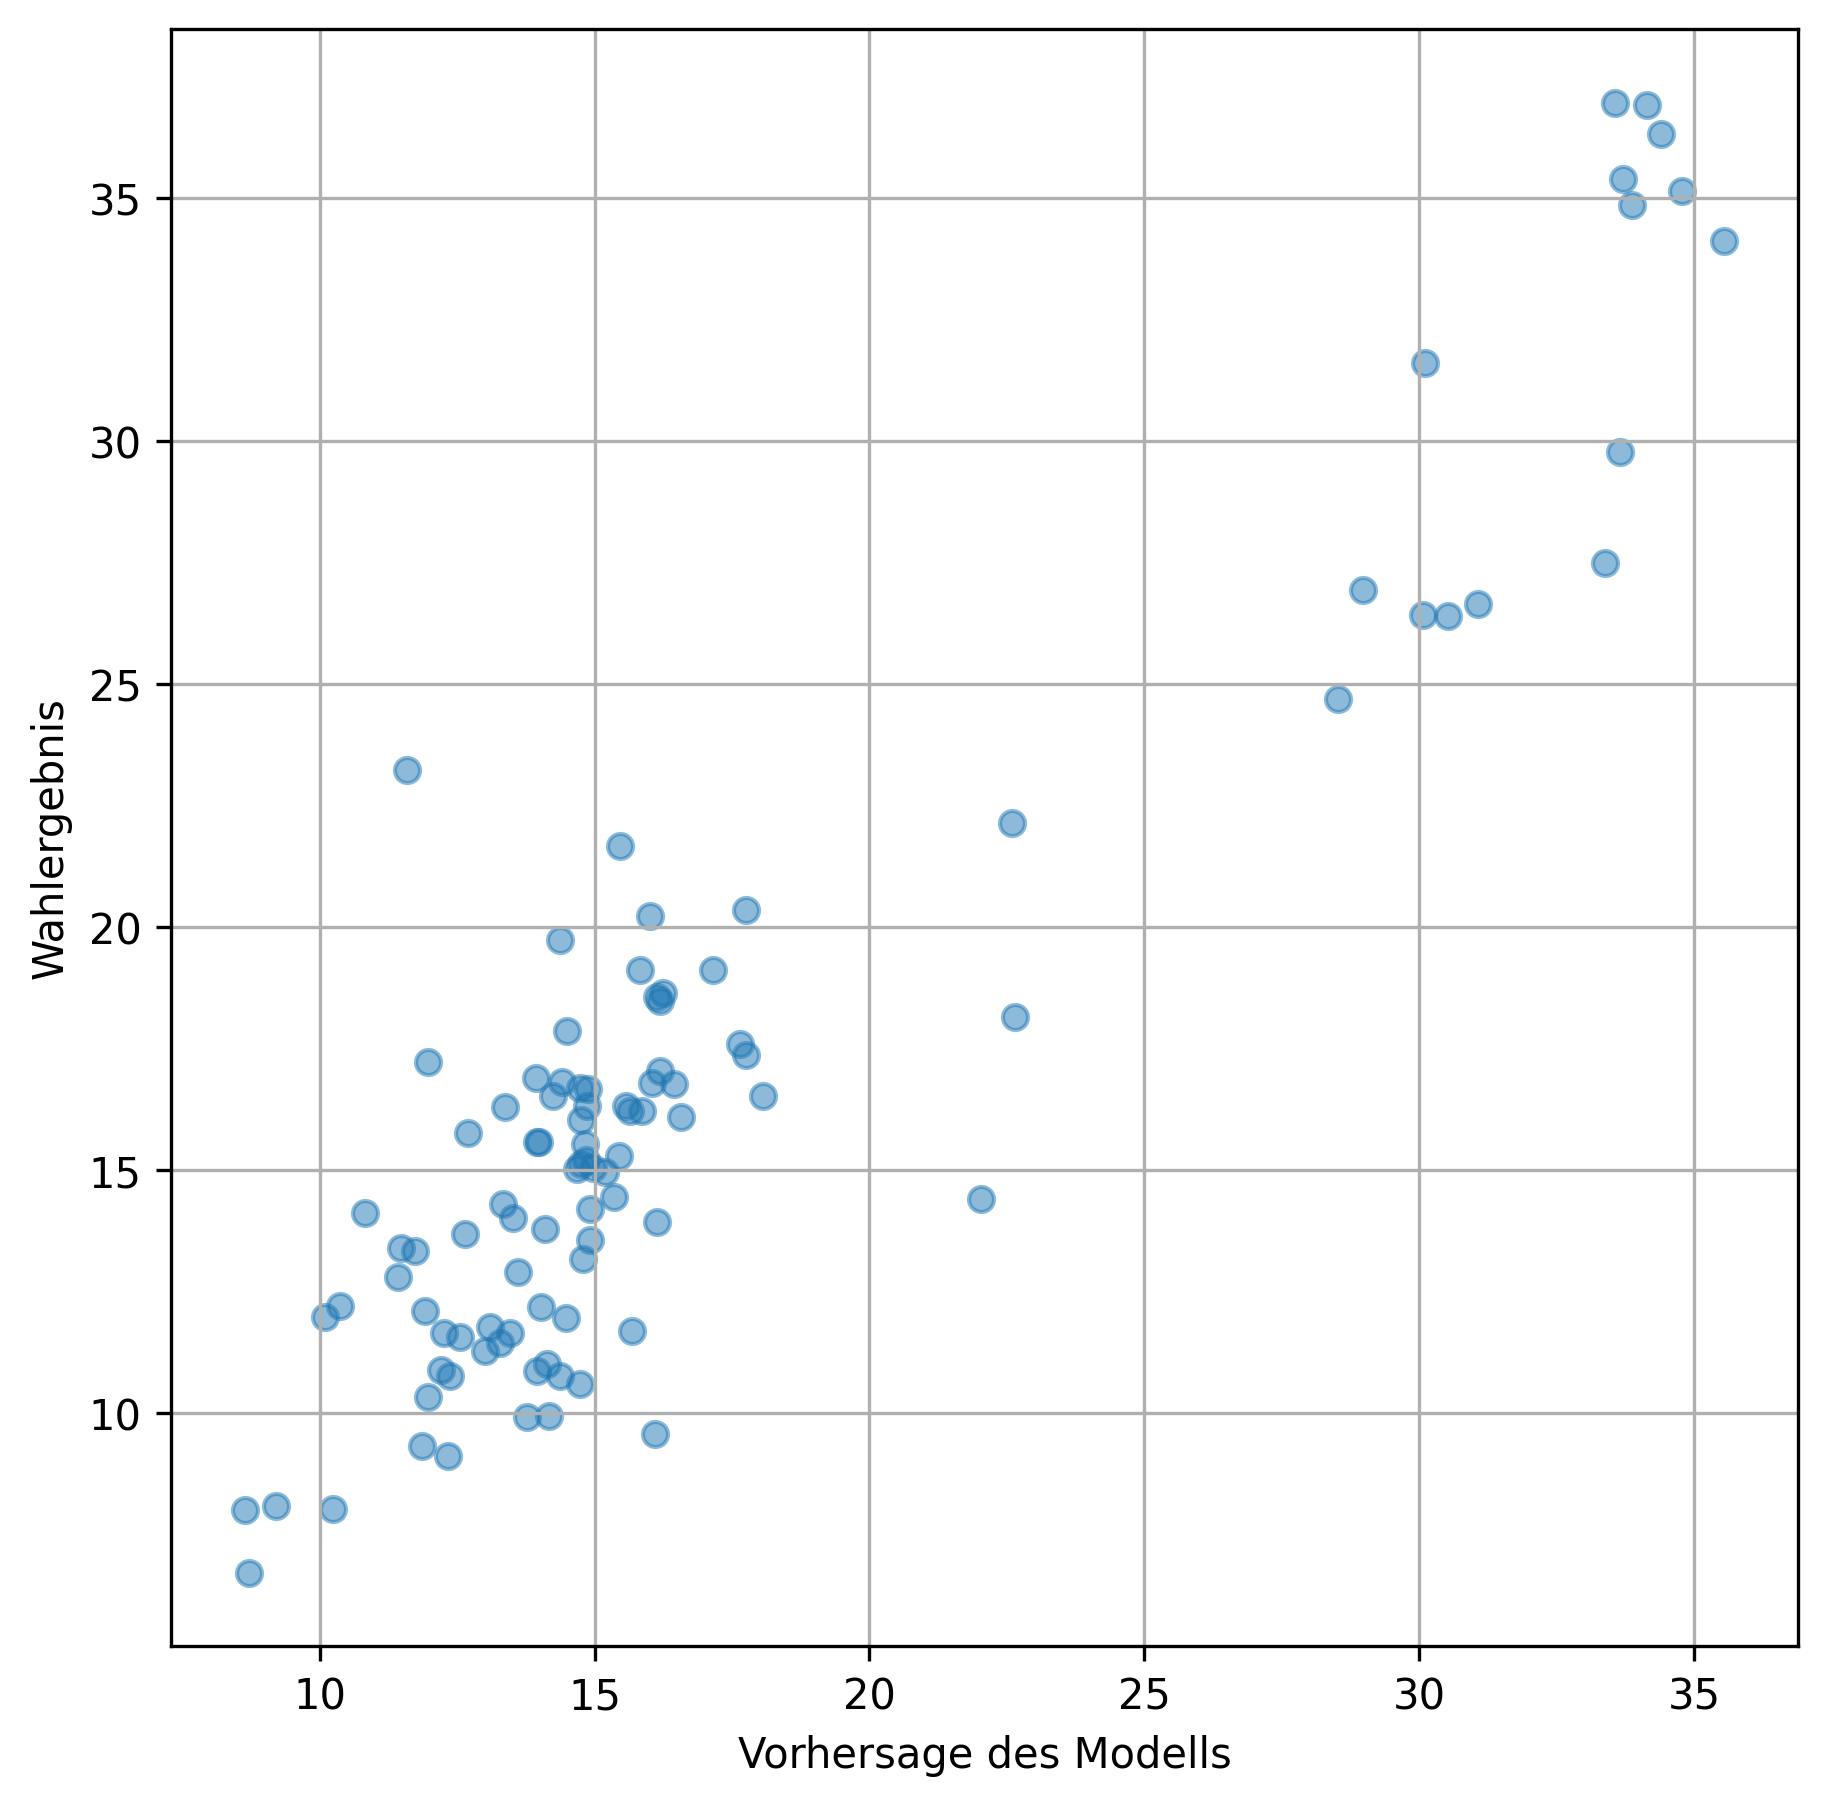

In [47]:
predictions = model.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
ax.scatter(predictions, y_test, alpha=0.5)
ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Wahlergebnis")
ax.grid(True)

In [176]:
#!pip install shap

In [50]:
import shap

pred = model.predict(X)

explainer = shap.TreeExplainer(model)
explanation = explainer(X)

shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

1.1368683772161603e-13

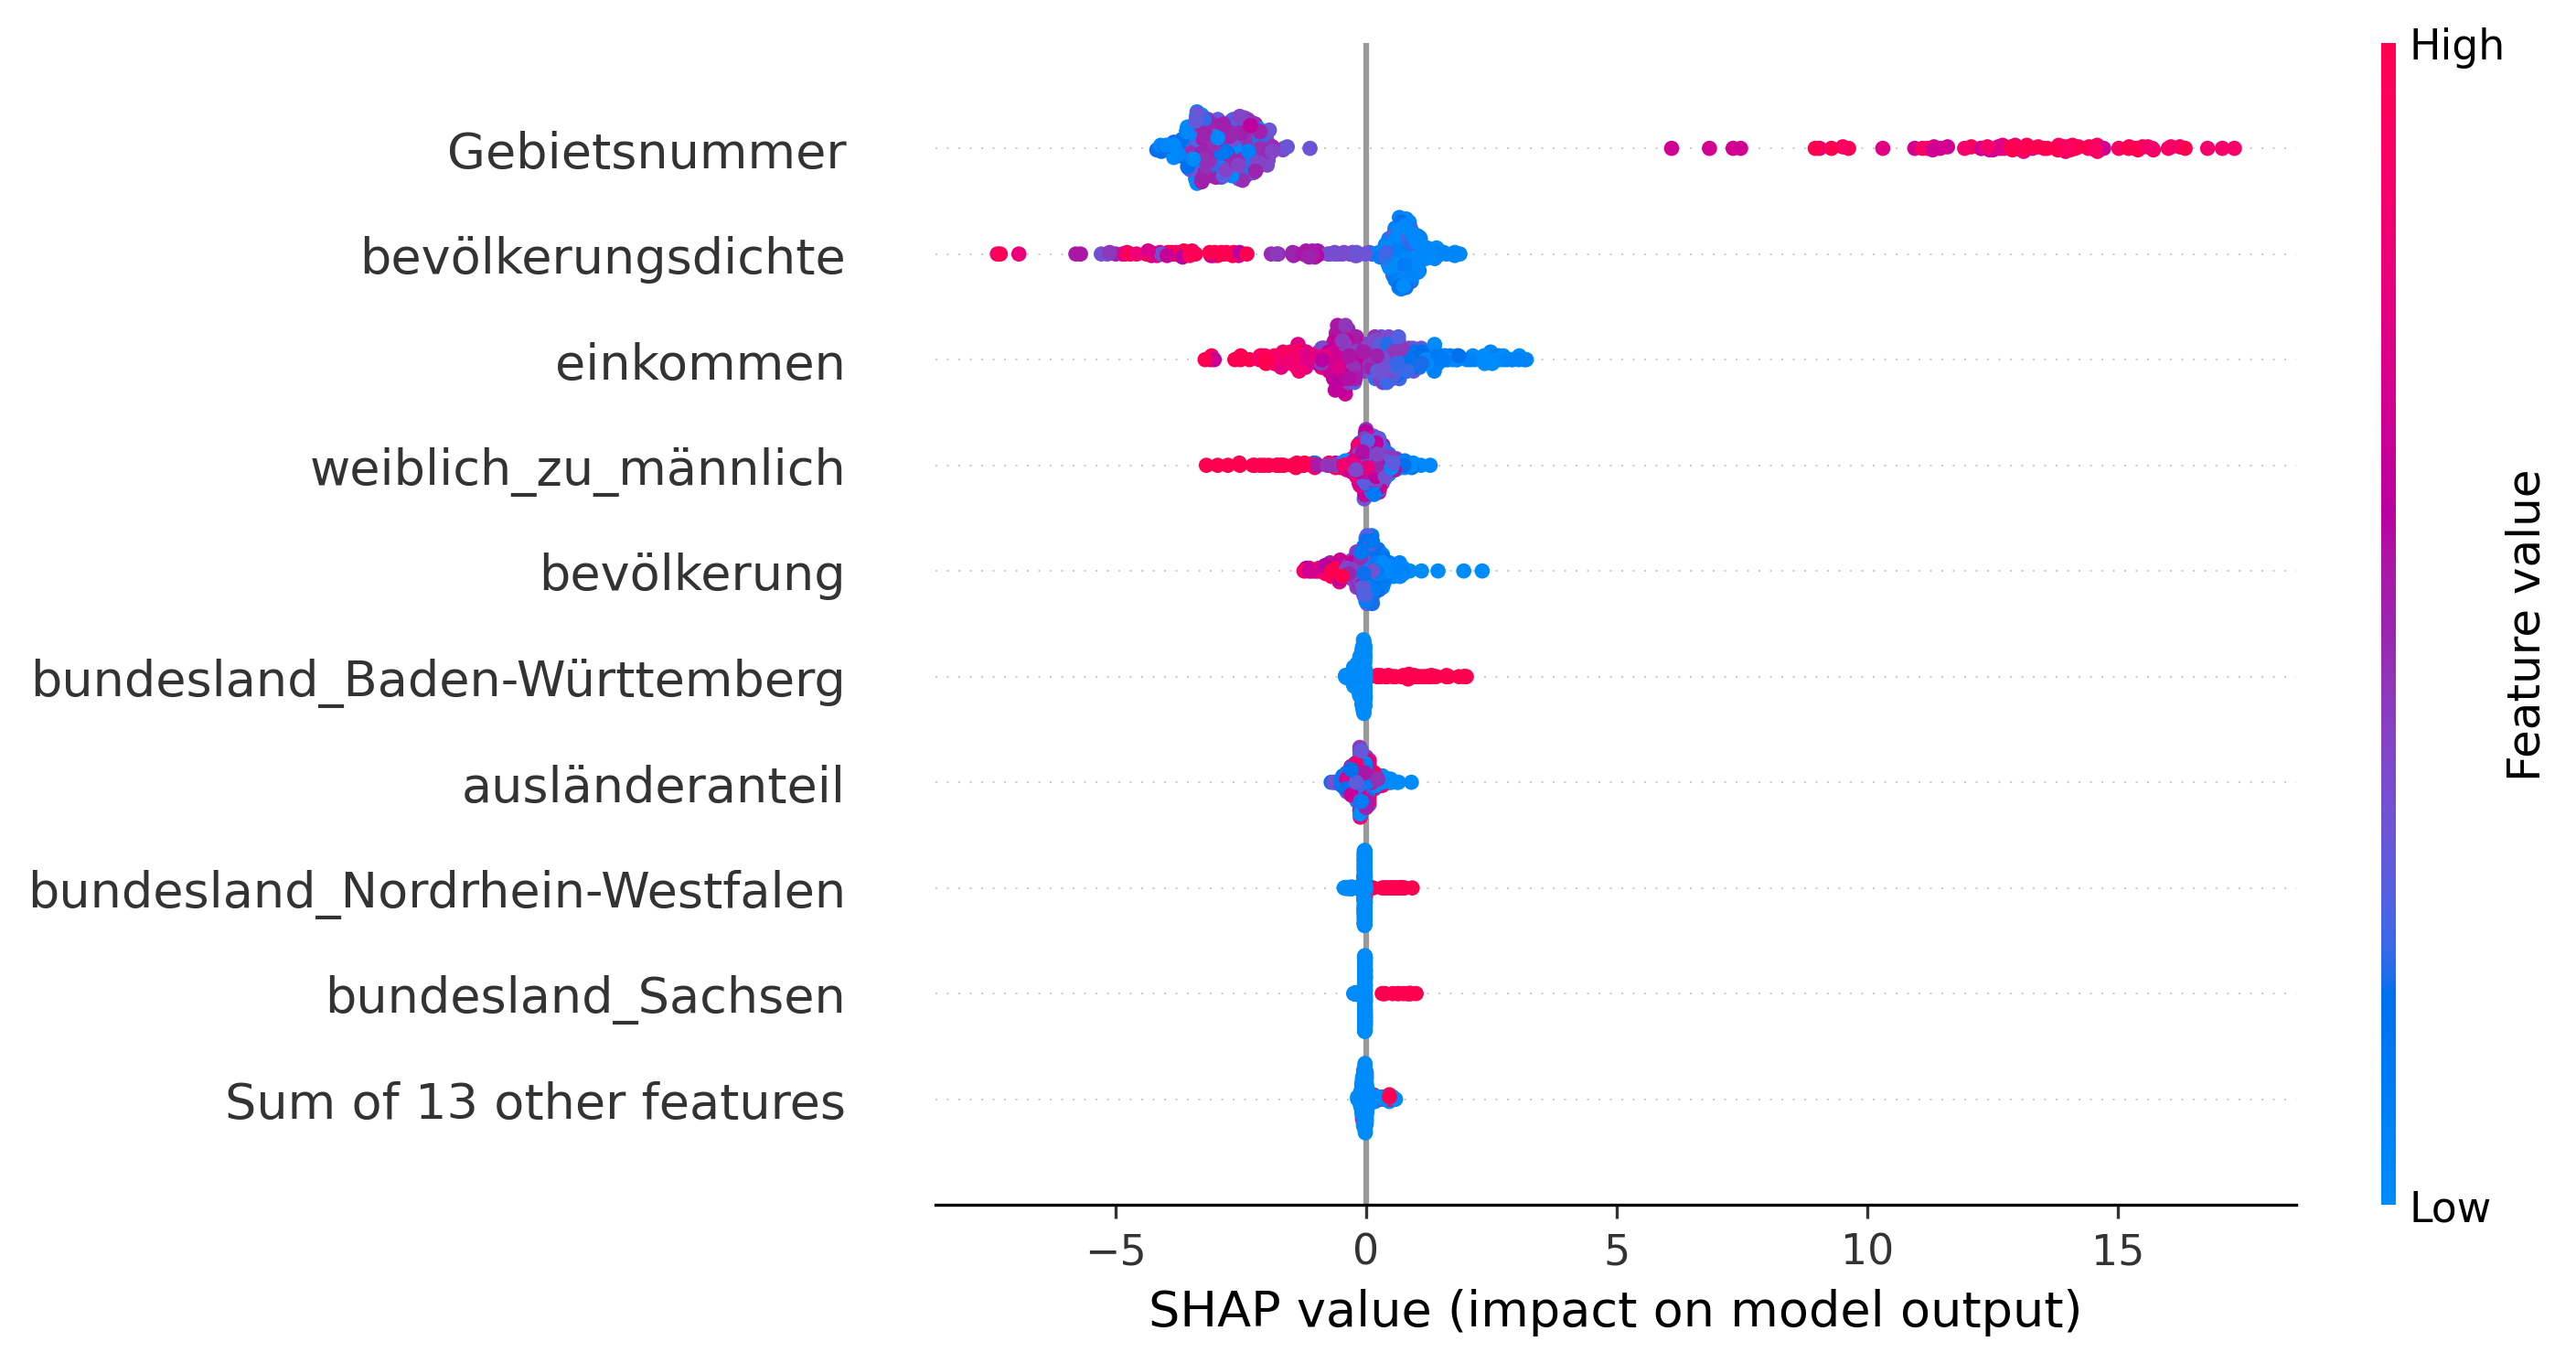

In [51]:
fig, ax = plt.subplots(dpi=300)
shap.plots.beeswarm(explanation)

## Train without Gebietsnummer

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X = results_afd.drop(["afd", "Gebietsname", "Gebietsnummer"], axis=1)
X = pd.get_dummies(X)
y = results_afd.afd

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)

In [53]:
model = RandomForestRegressor(max_depth=30, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30)

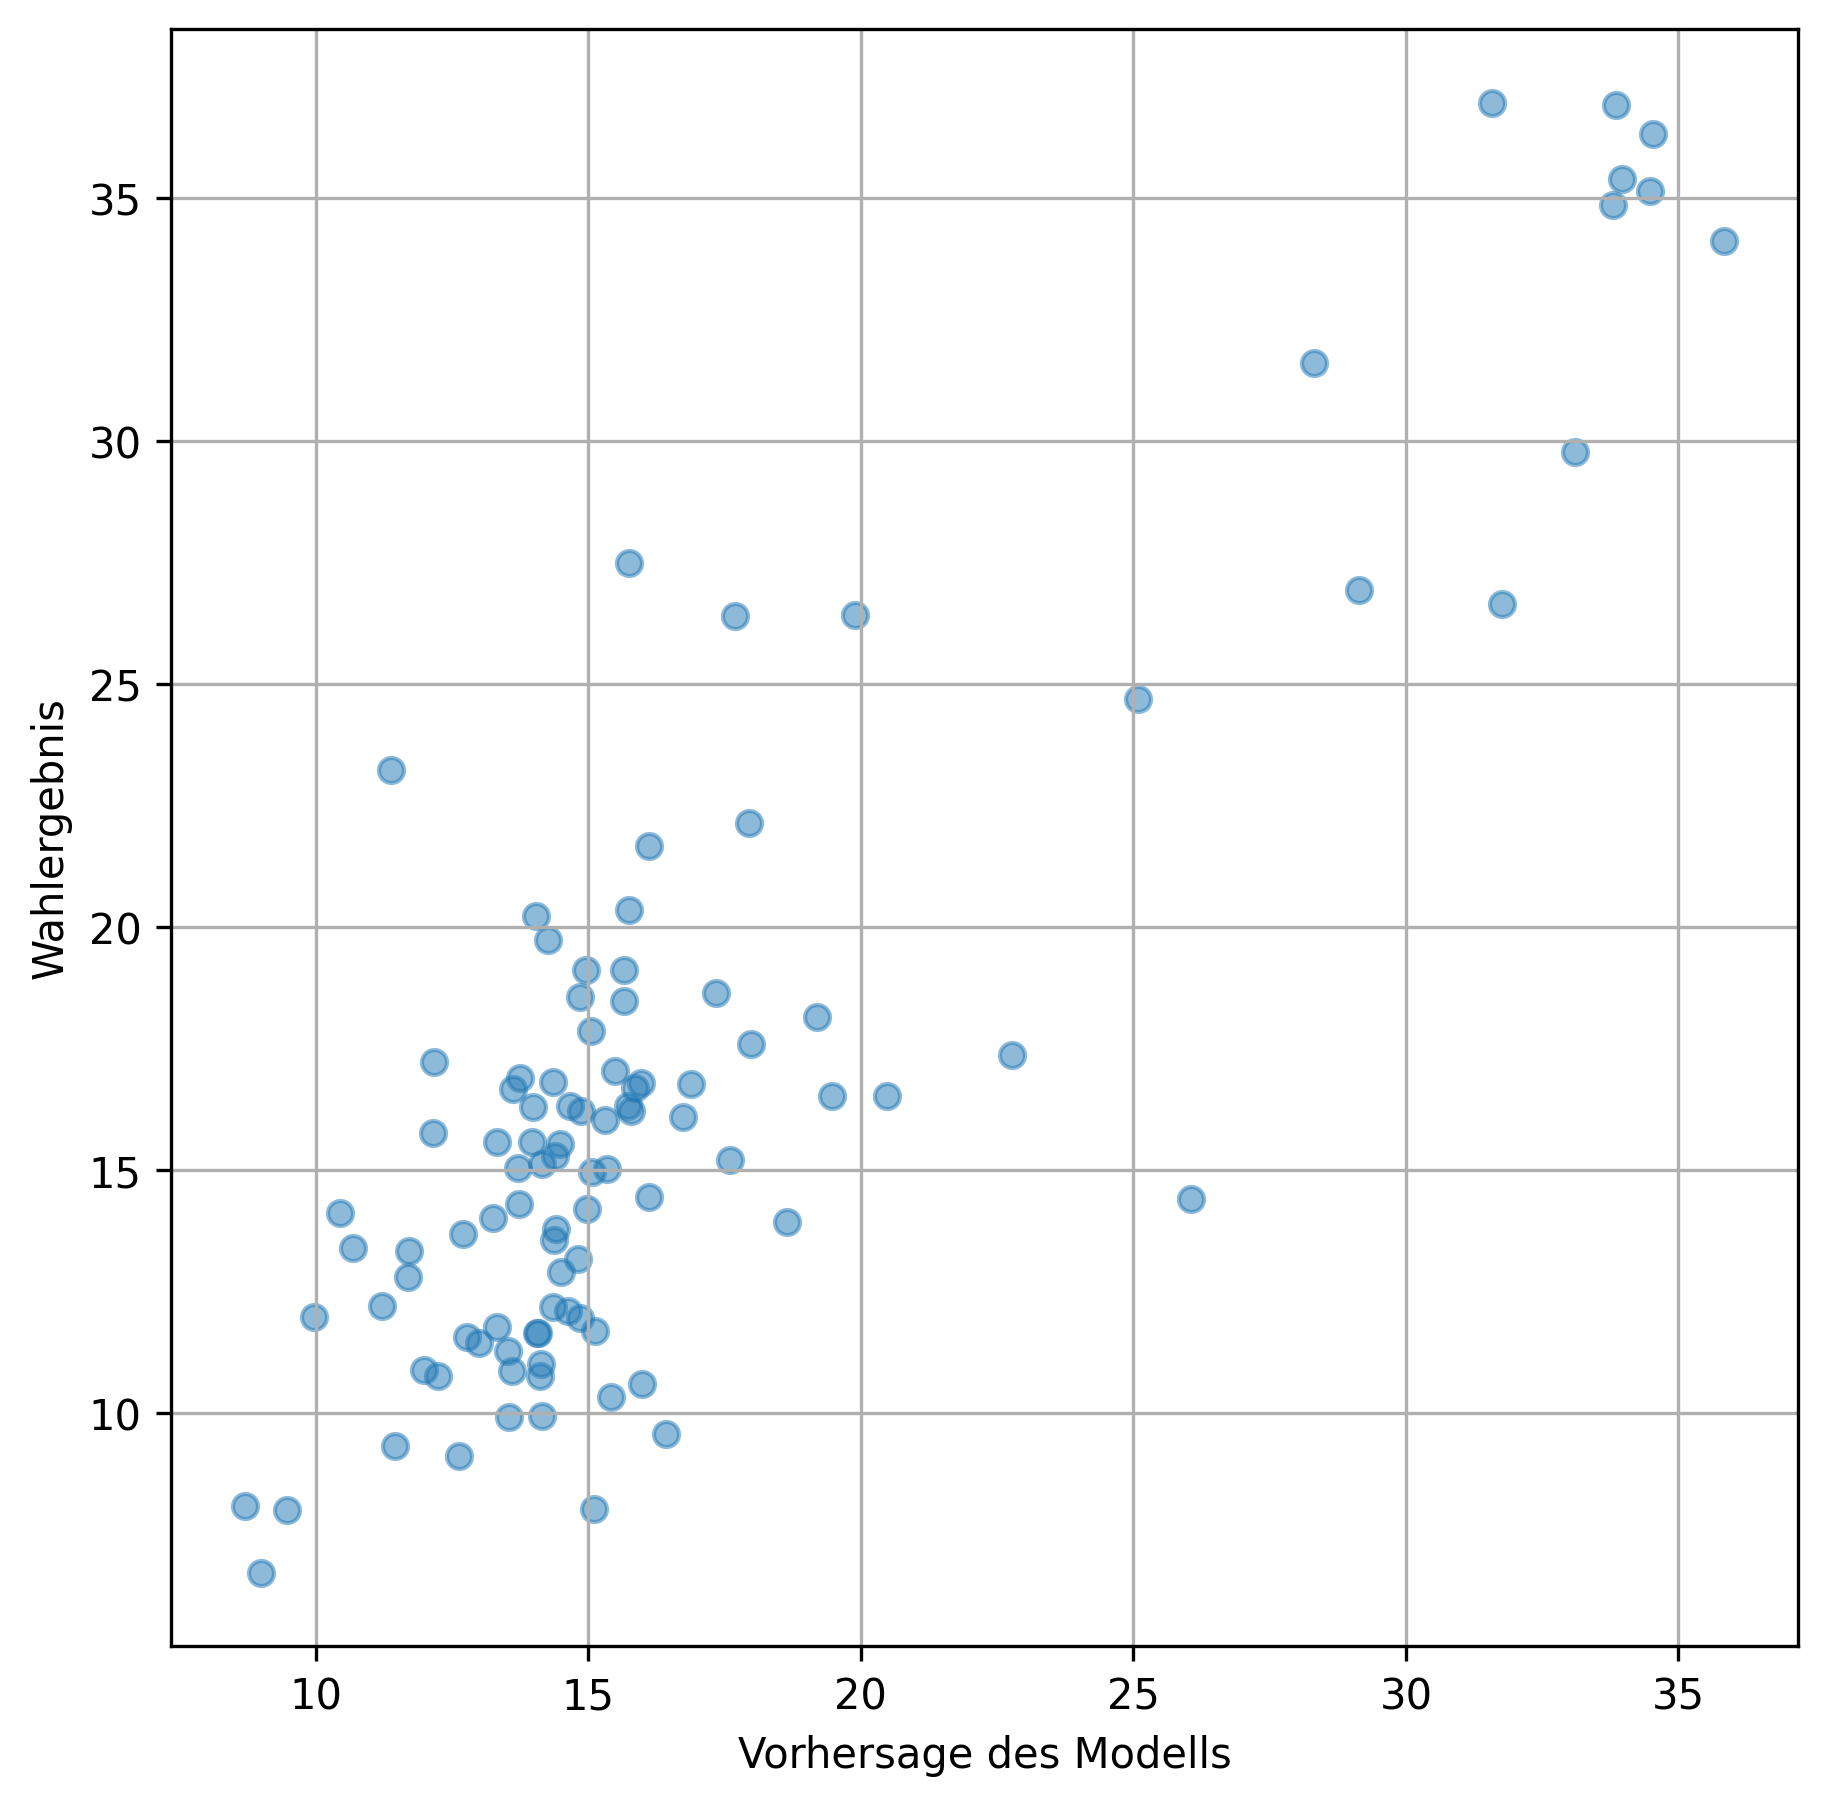

In [55]:
predictions = model.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
ax.scatter(predictions, y_test, alpha=0.5)
ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Wahlergebnis")
ax.grid(True)

In [56]:
pred = model.predict(X)

explainer = shap.TreeExplainer(model)
explanation = explainer(X)

shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

1.4921397450962104e-13

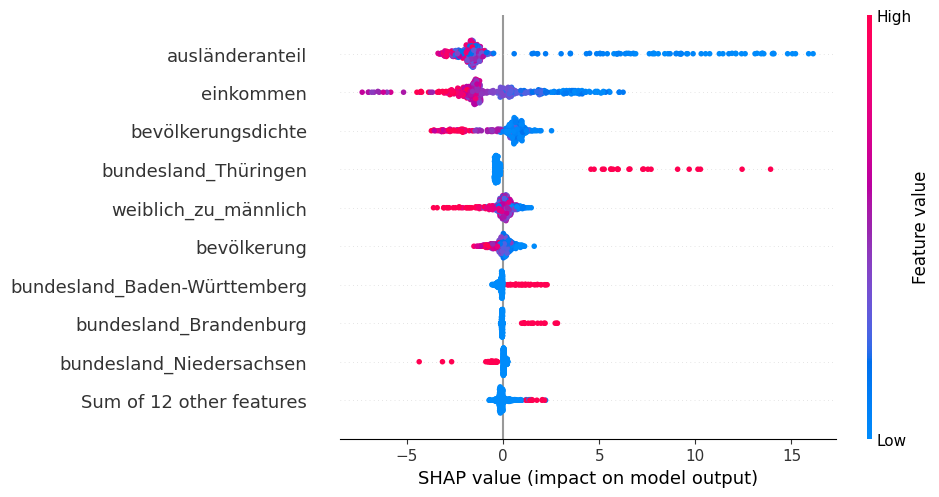

In [57]:
shap.plots.beeswarm(explanation)

## Training ohne Information zur Region

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X = results_afd.drop(["afd", "Gebietsname", "Gebietsnummer", "bundesland"], axis=1)
X = pd.get_dummies(X)
y = results_afd.afd

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)

In [59]:
X_train.head()

,bevölkerung,bevölkerungsdichte,weiblich_zu_männlich,einkommen,ausländeranteil
10421,125701.0,118.0,0.494674,25083.0,14.5
3128,629047.0,2893.0,0.517508,27851.0,22.3
12839,180425.0,350.0,0.503179,25678.0,17.3
6872,101228.0,725.0,0.496701,20937.0,21.5
11708,523026.0,2805.0,0.511975,24057.0,26.1


In [60]:
model = RandomForestRegressor(max_depth=30, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30)

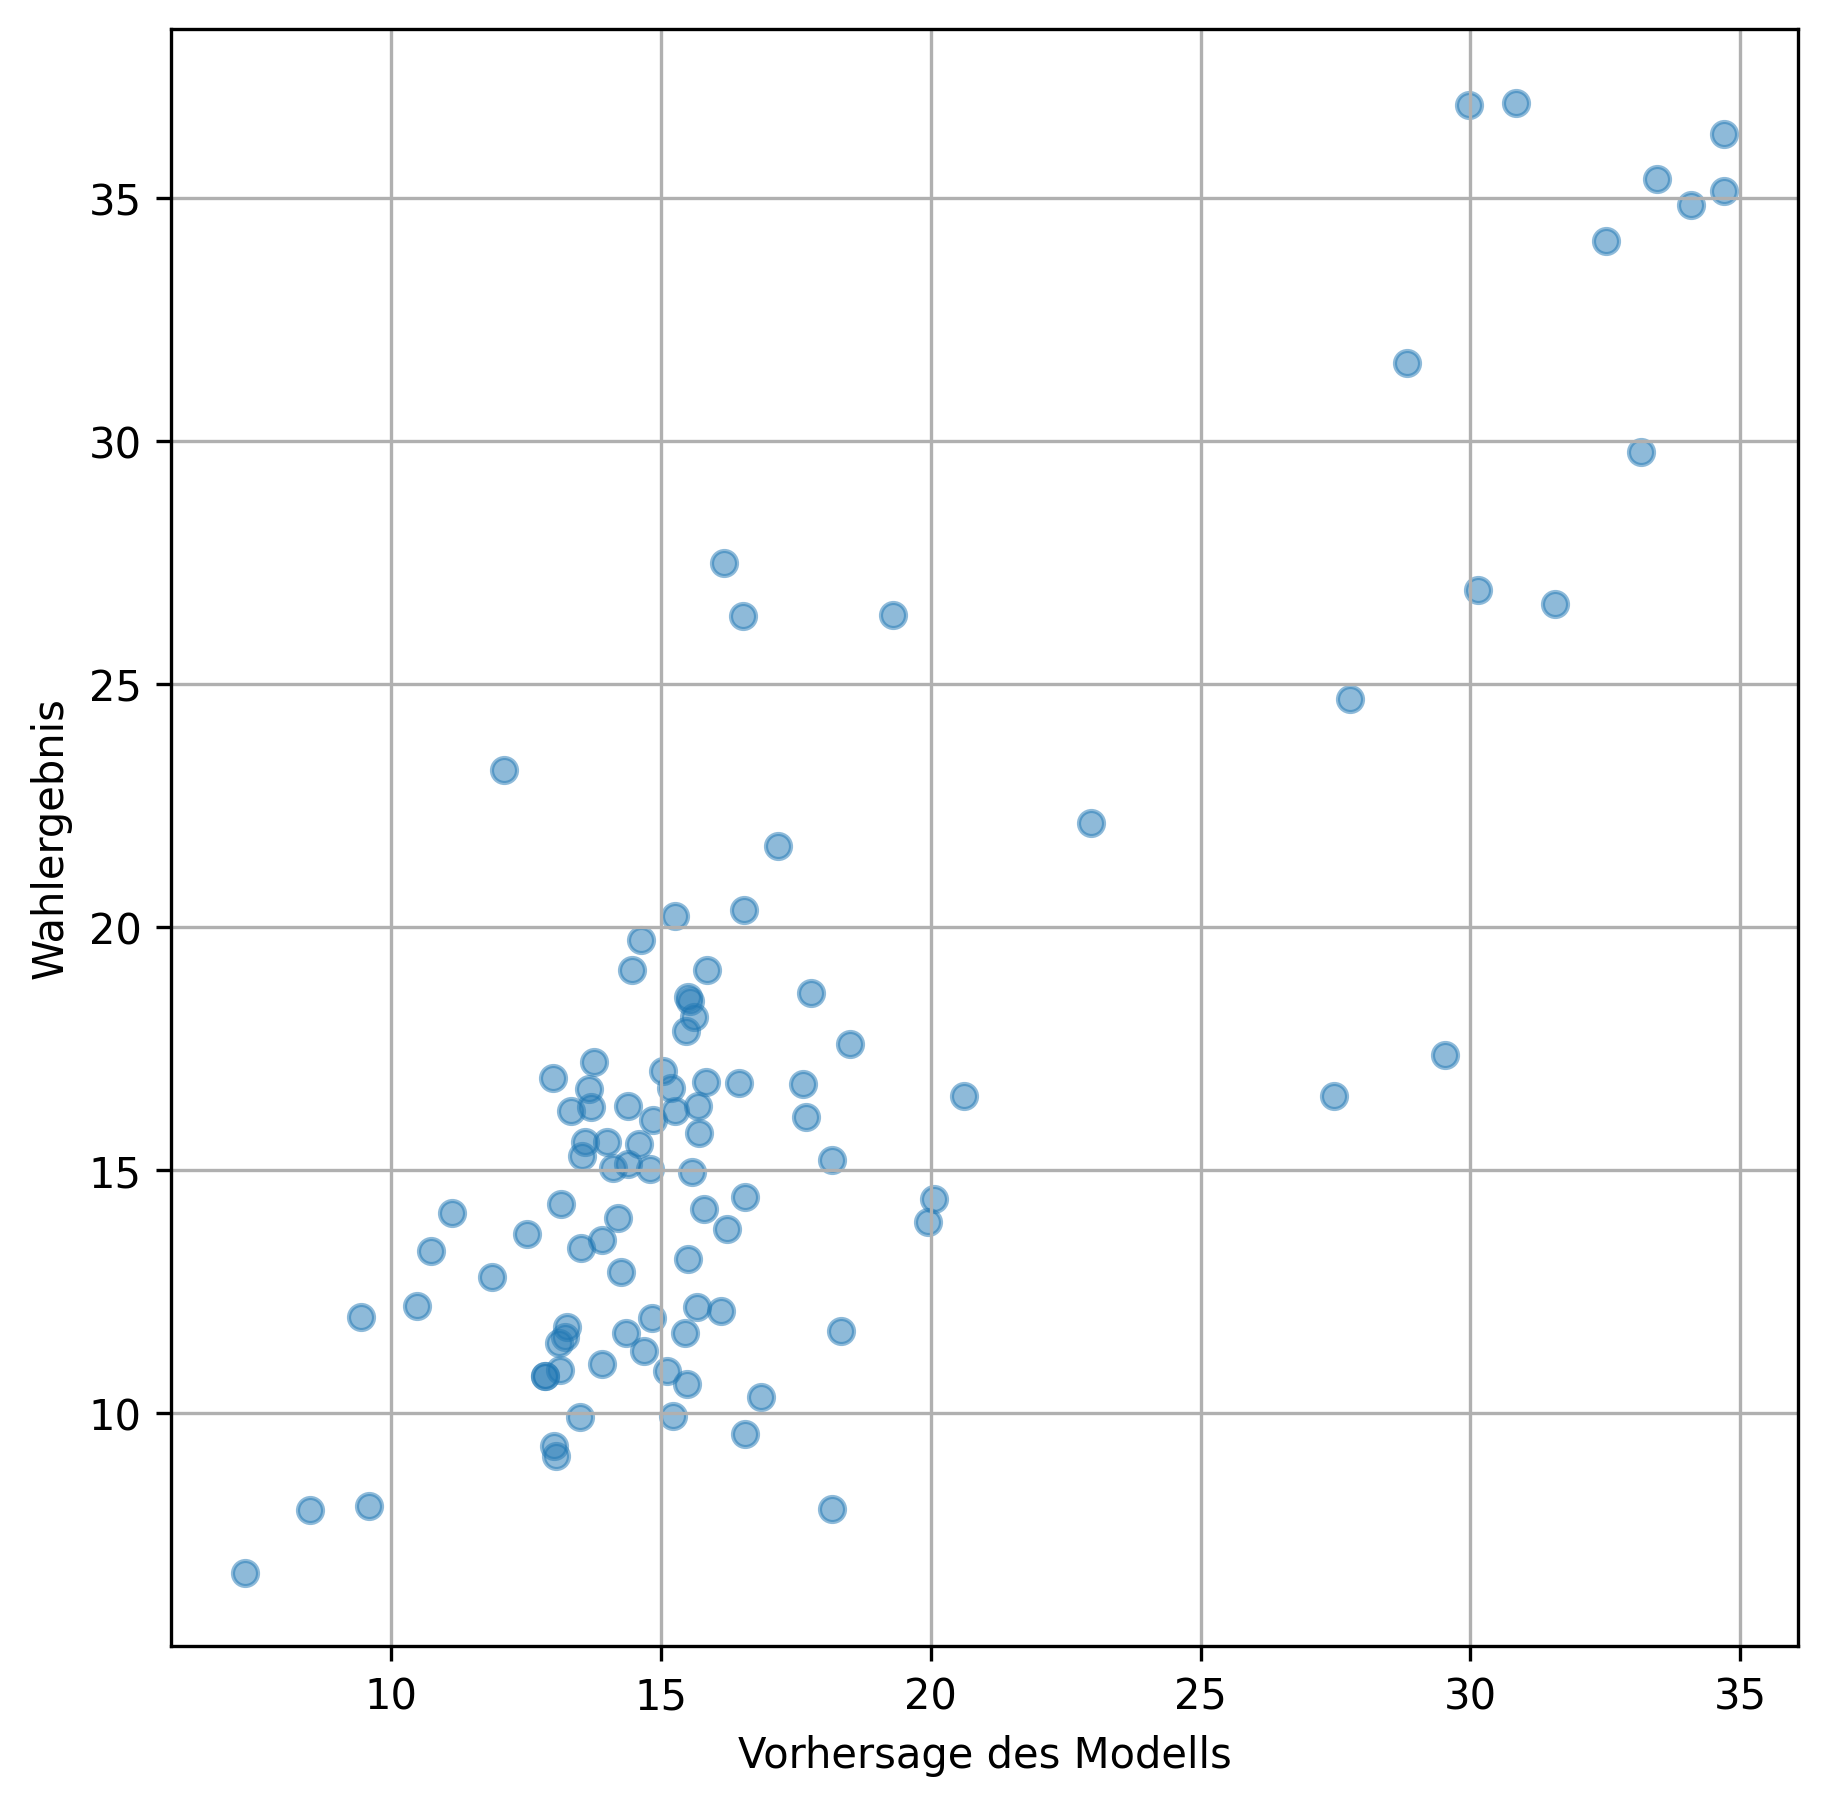

In [61]:
predictions = model.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
ax.scatter(predictions, y_test, alpha=0.5)
ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Wahlergebnis")
ax.grid(True)

In [62]:
pred = model.predict(X)

explainer = shap.TreeExplainer(model)
explanation = explainer(X)

shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

1.3145040611561853e-13

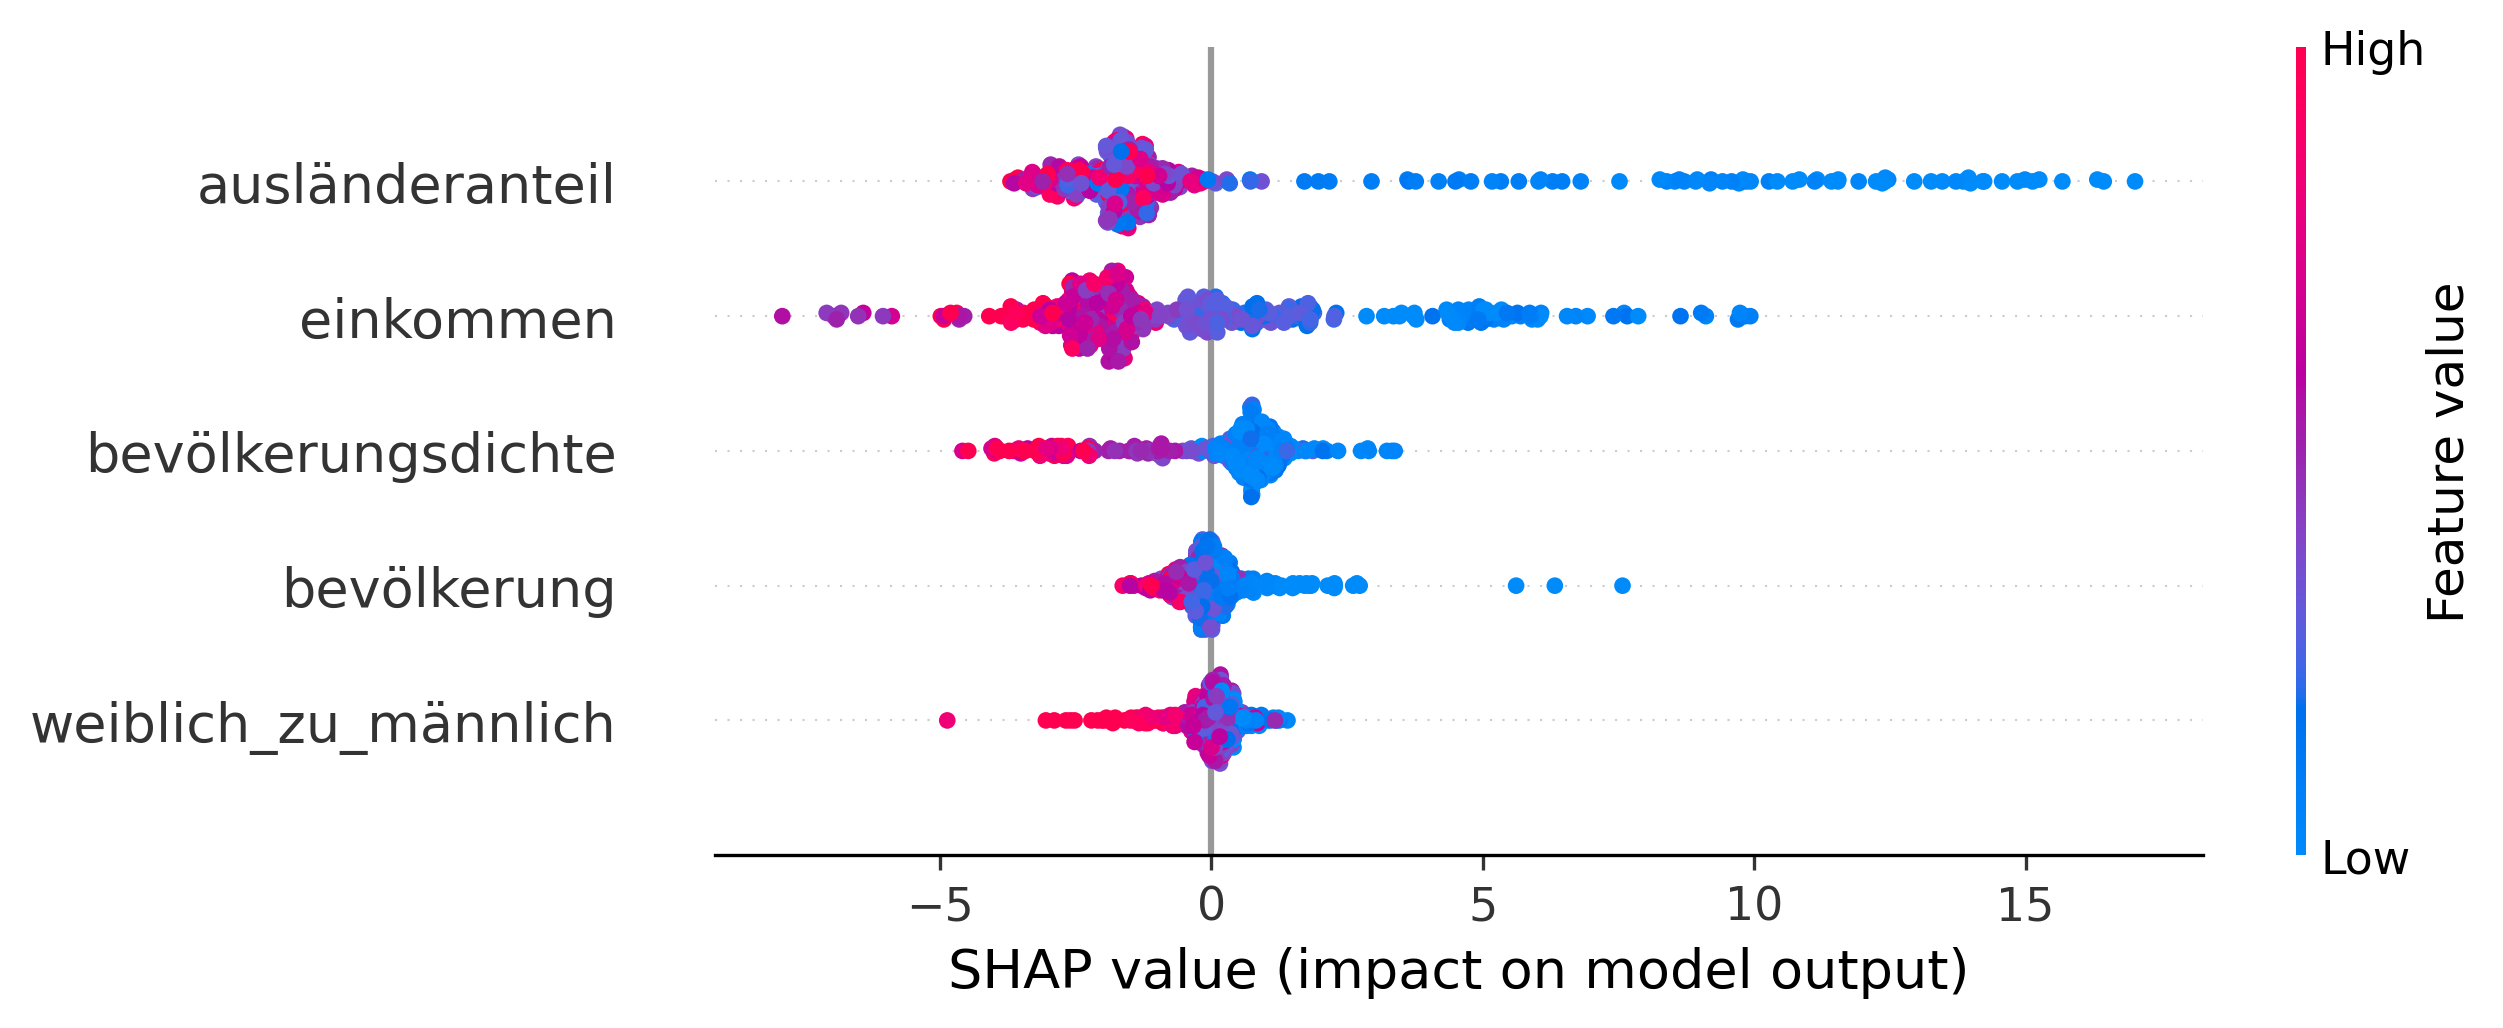

In [63]:
fig, ax = plt.subplots(dpi=300)
shap.plots.beeswarm(explanation)

## Training ohne Information zur Region II

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X = results_afd.drop(["afd", "Gebietsname", "Gebietsnummer", "bundesland", "weiblich_zu_männlich", "bevölkerung"], axis=1)
X = pd.get_dummies(X)
y = results_afd.afd

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)

In [255]:
X_train.head()

,bevölkerungsdichte,einkommen,ausländeranteil
10421,118.0,25083.0,14.5
3128,2893.0,27851.0,22.3
12839,350.0,25678.0,17.3
6872,725.0,20937.0,21.5
11708,2805.0,24057.0,26.1


In [65]:
model = RandomForestRegressor(max_depth=30, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30)

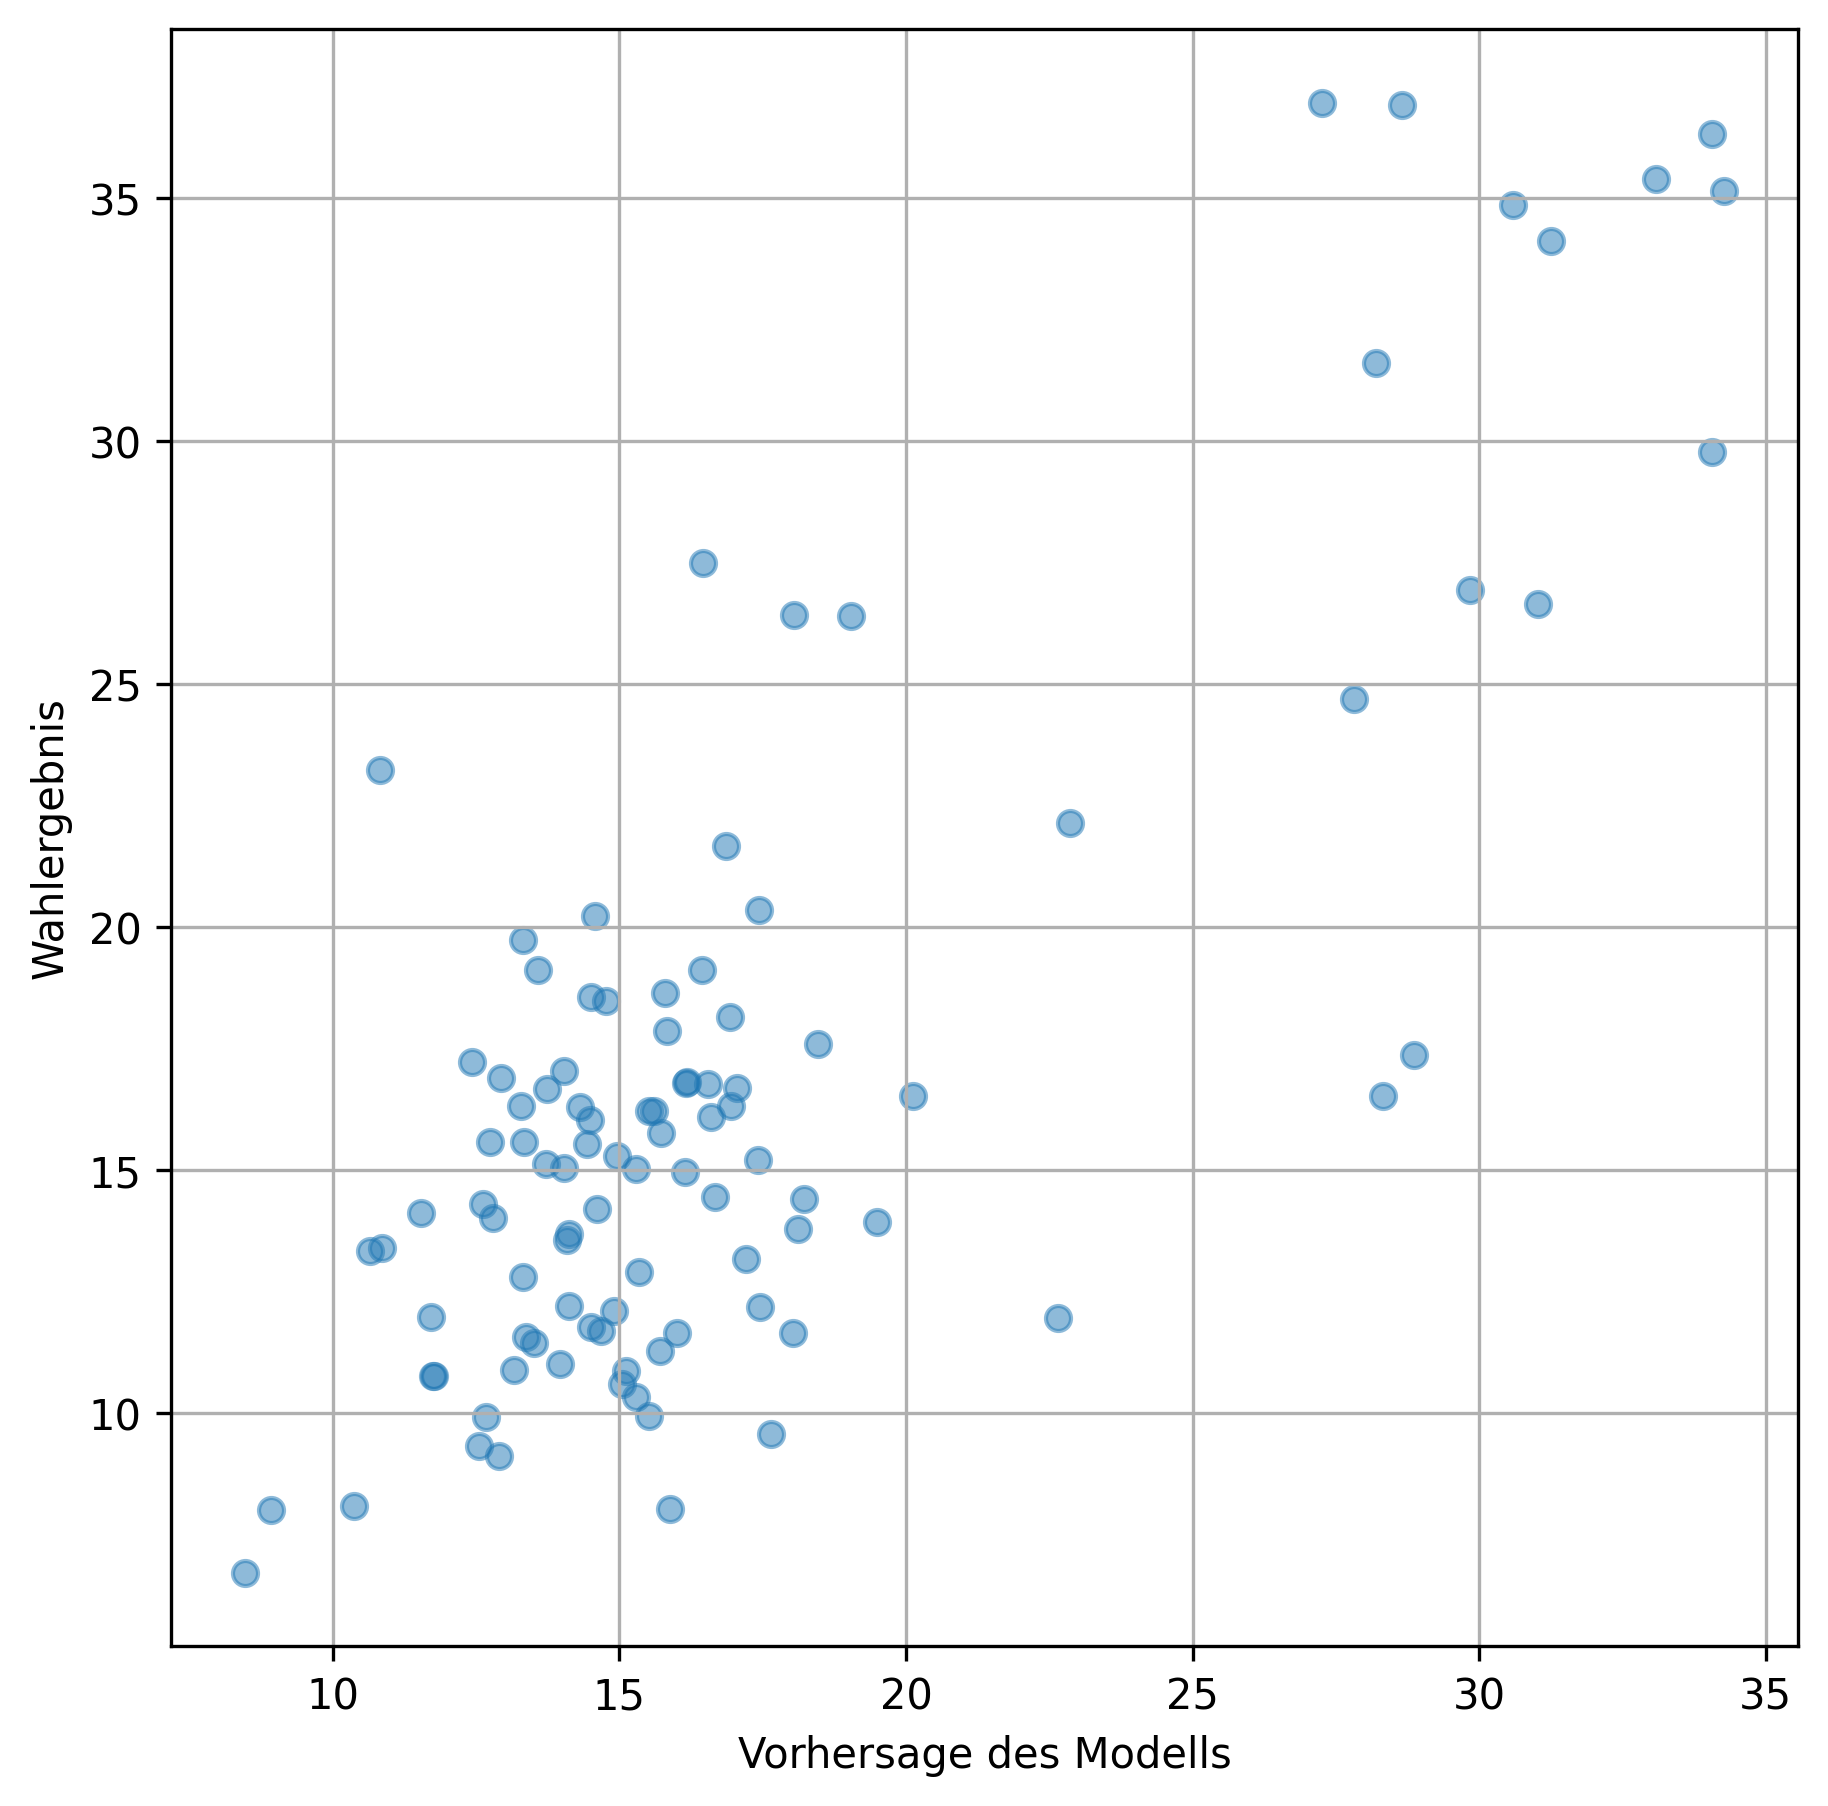

In [66]:
predictions = model.predict(X_test)

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
ax.scatter(predictions, y_test, alpha=0.5)
ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Wahlergebnis")
ax.grid(True)

In [67]:
pred = model.predict(X)

explainer = shap.TreeExplainer(model)
explanation = explainer(X)

shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

2.3447910280083306e-13

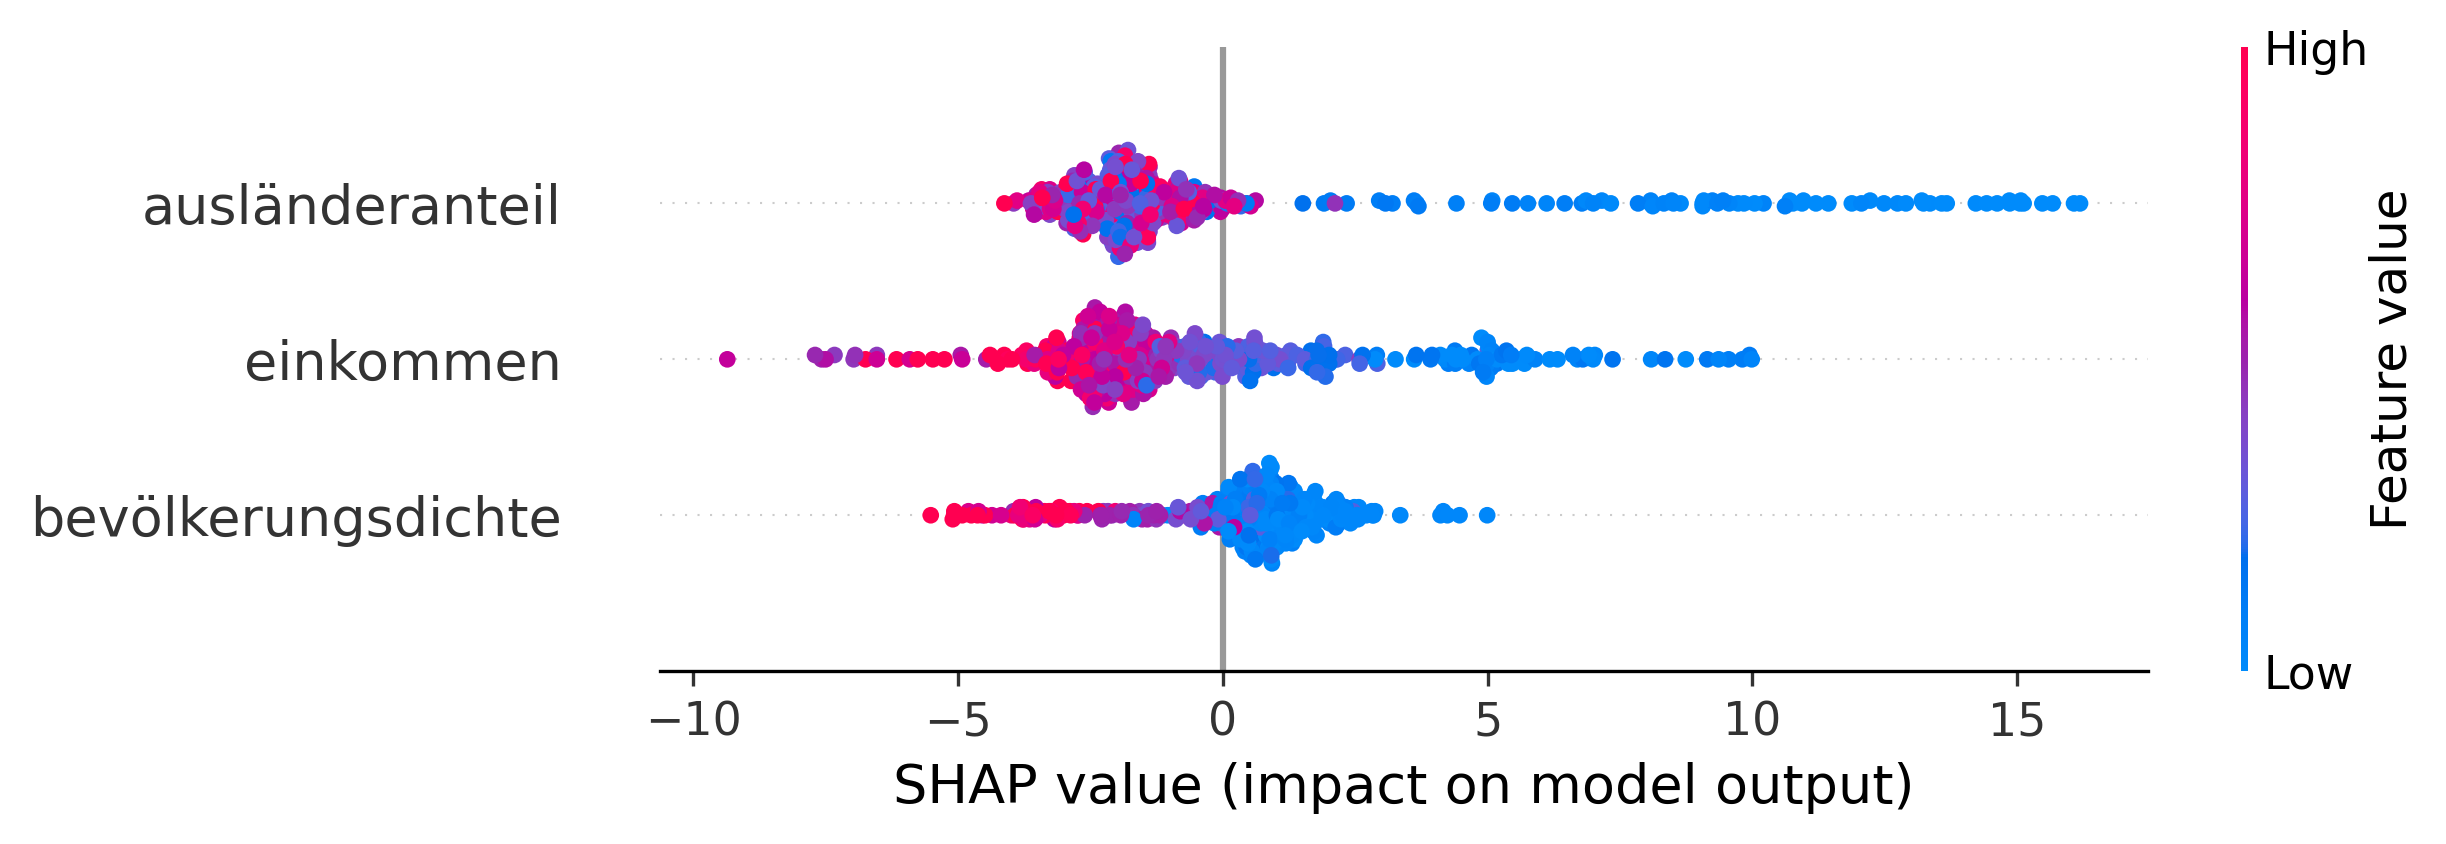

In [68]:
fig, ax = plt.subplots(dpi=300)
shap.plots.beeswarm(explanation)

# Zum Vergleich: ein "Boosting"-Modell
Hier: XGBoost

In [70]:
#!pip install xgboost

In [71]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [72]:
# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute mean squared error for each fold
cv_scores = cross_val_score(xgb_regressor, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared error
cv_scores = -cv_scores

# Print the cross-validation scores
print(f'Cross-Validation MSE scores for each fold: {cv_scores}')
print(f'Mean Cross-Validation RMSE: {np.sqrt(np.mean(cv_scores))}')

# Train the final model on the entire dataset
xgb_regressor.fit(X, y)

Cross-Validation MSE scores for each fold: [19.82339843 12.36862017 16.79623951 15.4974875  20.97609617]
Mean Cross-Validation RMSE: 4.134291759854997


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Maximum difference between SHAP values sum and model prediction: 2.288818359375e-05


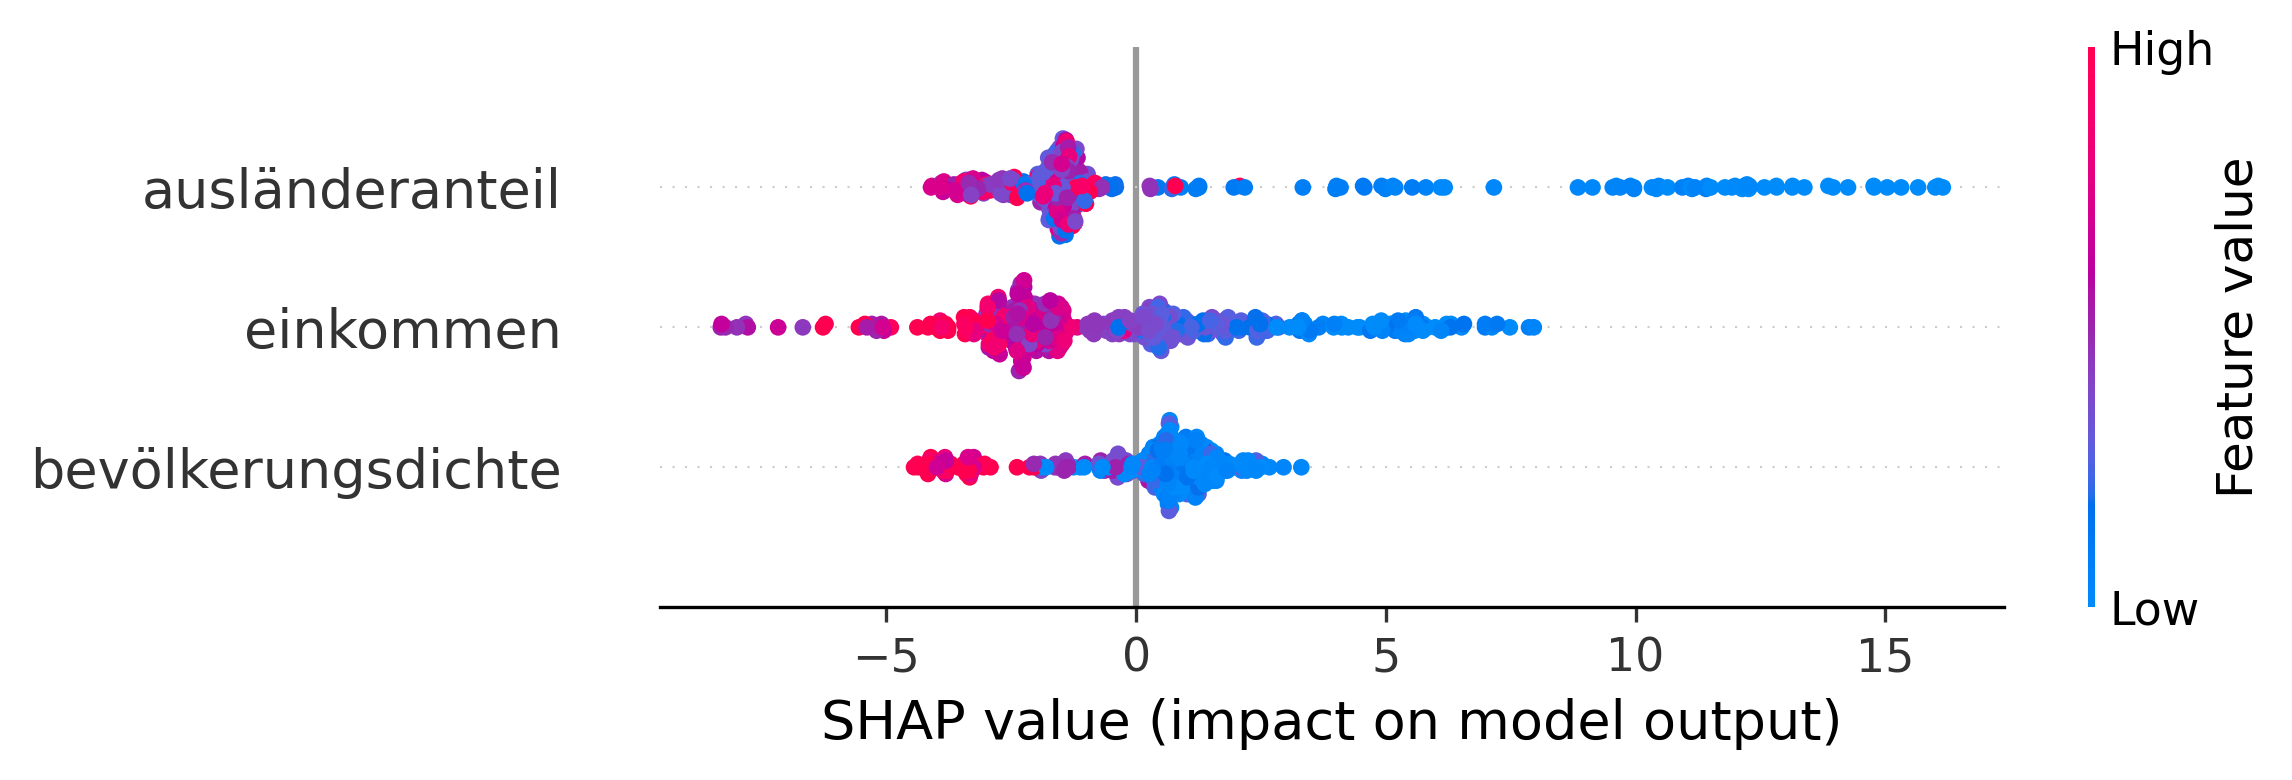

In [73]:
pred = xgb_regressor.predict(X)

# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_regressor)

# Get the SHAP values
explanation = explainer(X)

# Extract SHAP values
shap_values = explanation.values

# Ensure SHAP values add up to marginal predictions
max_difference = np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

# Print the maximum difference
print(f'Maximum difference between SHAP values sum and model prediction: {max_difference}')

# Plot the summary of the SHAP values to show feature importance
fig, ax = plt.subplots(dpi=300)
shap.summary_plot(shap_values, X)

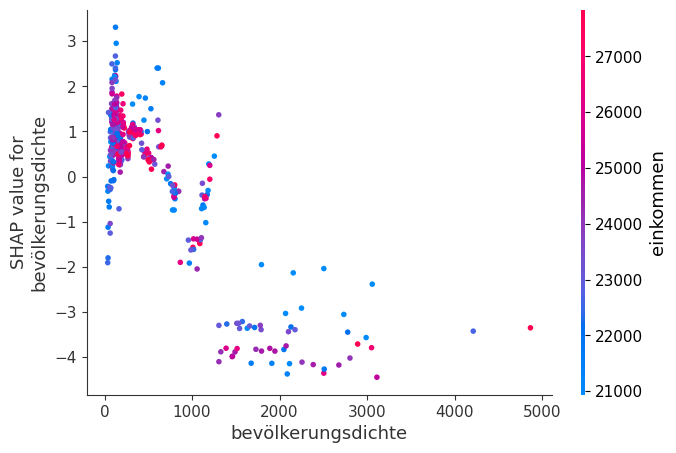

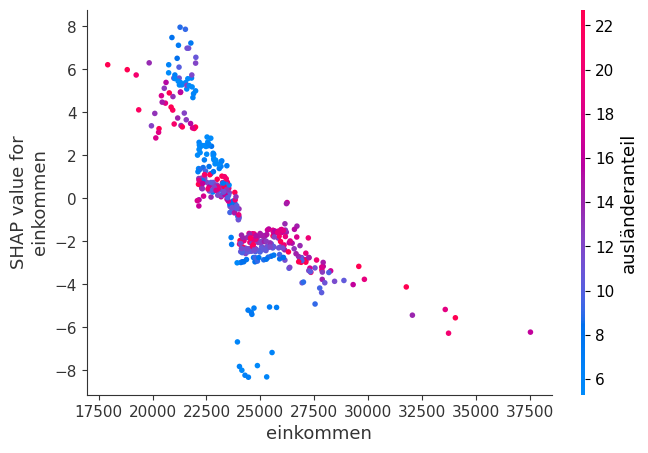

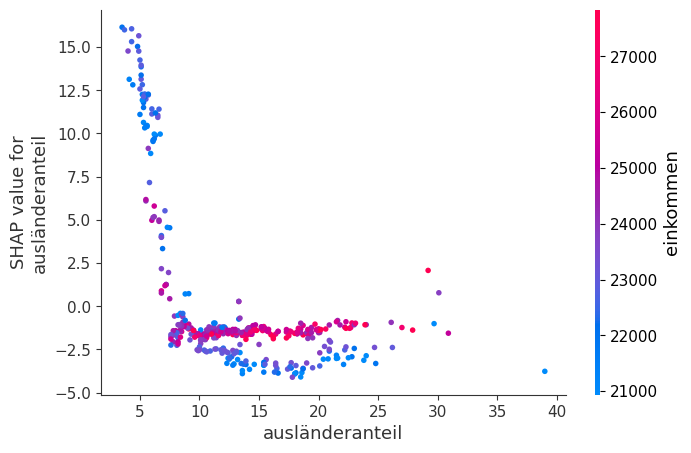

In [74]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

In [75]:
# print the JS visualization code to the notebook
shap.initjs()

In [76]:
shap.force_plot(
    explainer.expected_value, shap_values, X
)